In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("02_ML.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (2111, 17)


In [10]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (2111, 17)


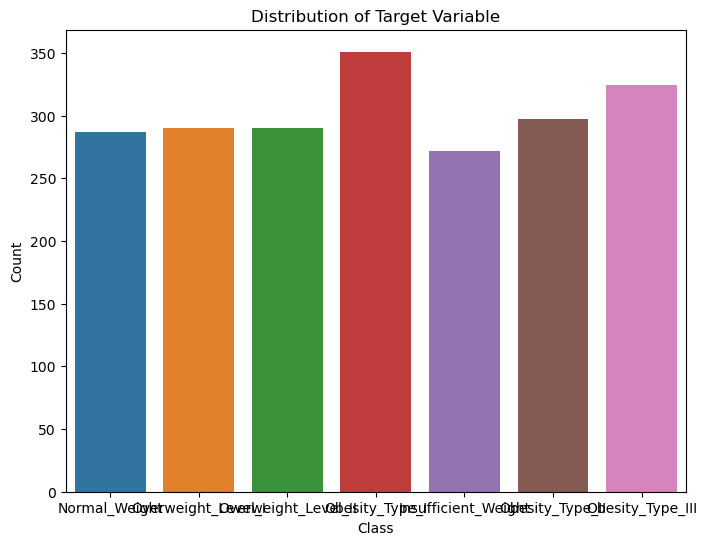

In [11]:
# Check the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x="NObeyesdad", data=data)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

C:\Users\z_parthak\AppData\Local\Temp\ipykernel_9284\3525099928.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


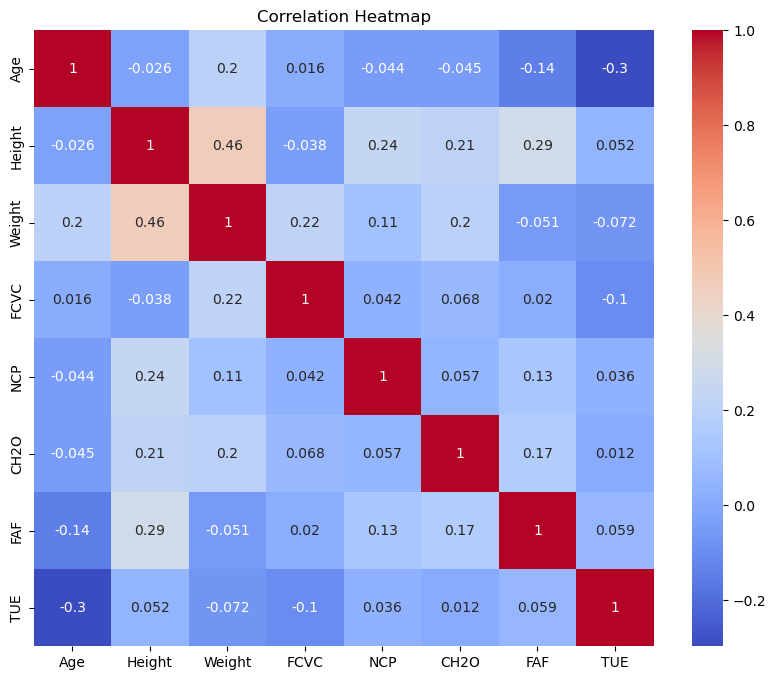

In [12]:
# Check the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

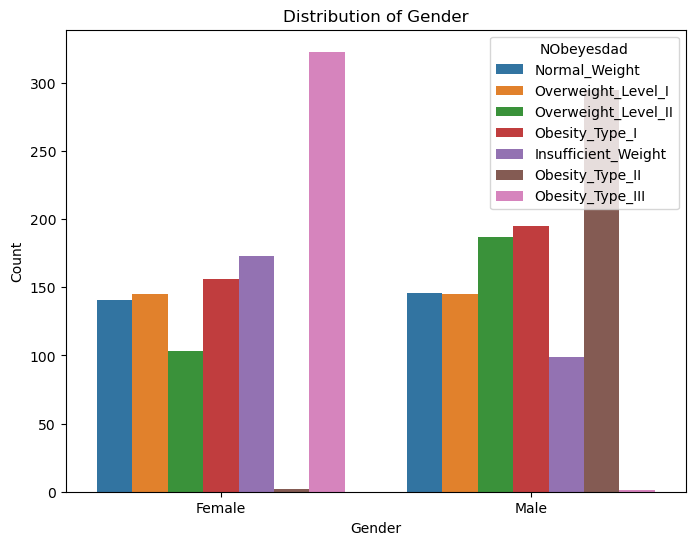

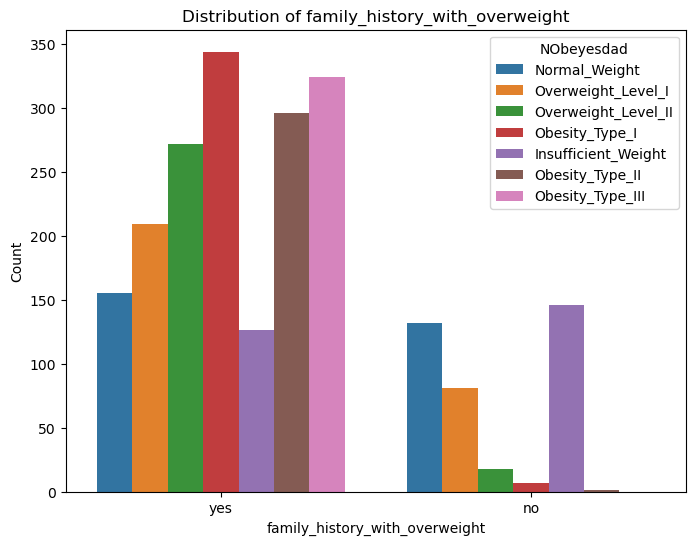

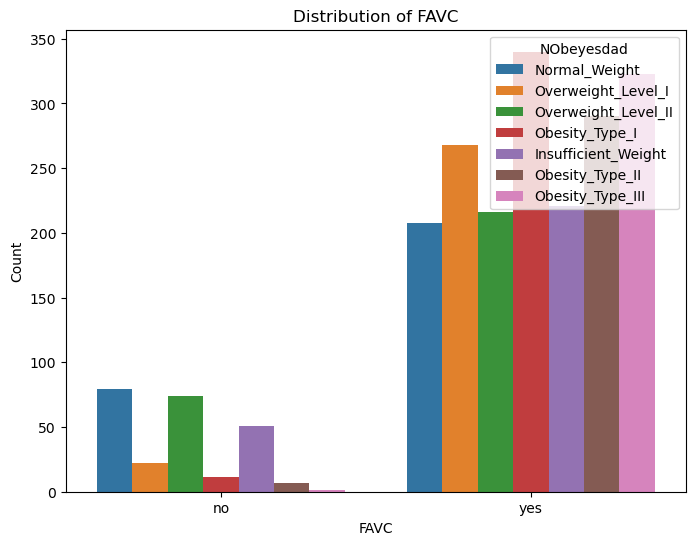

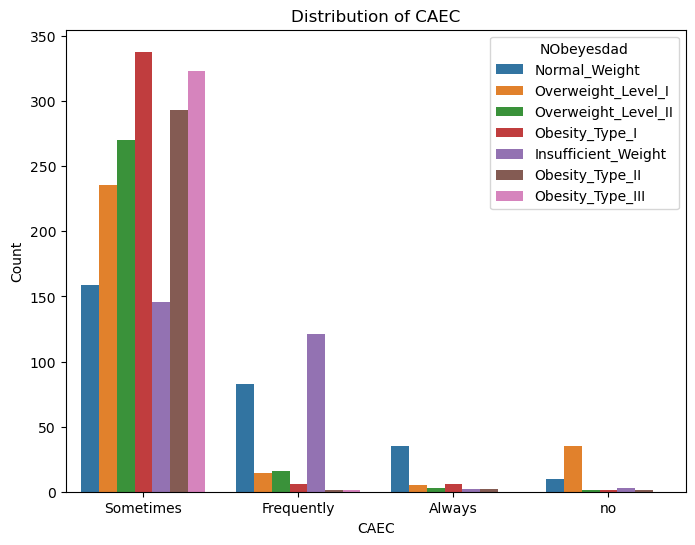

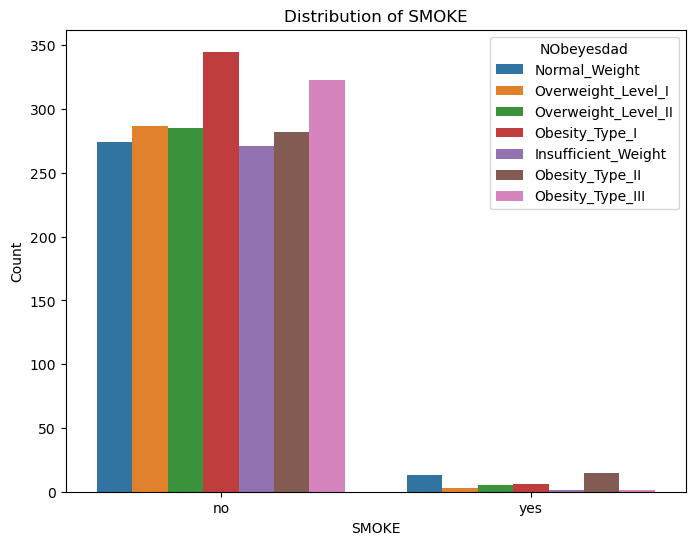

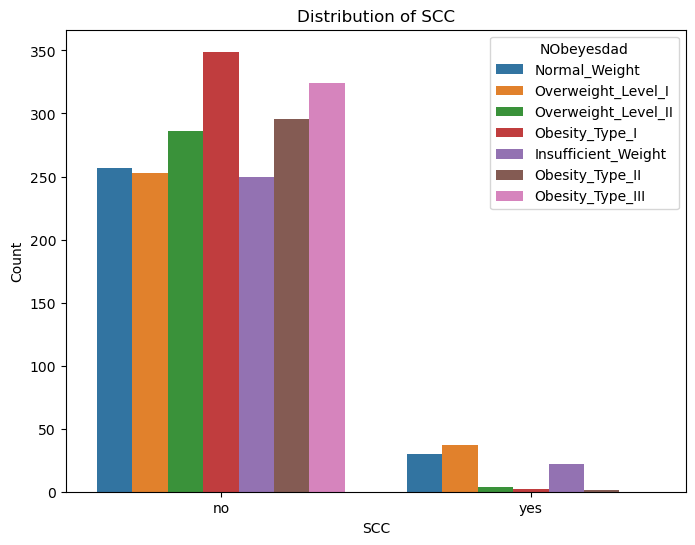

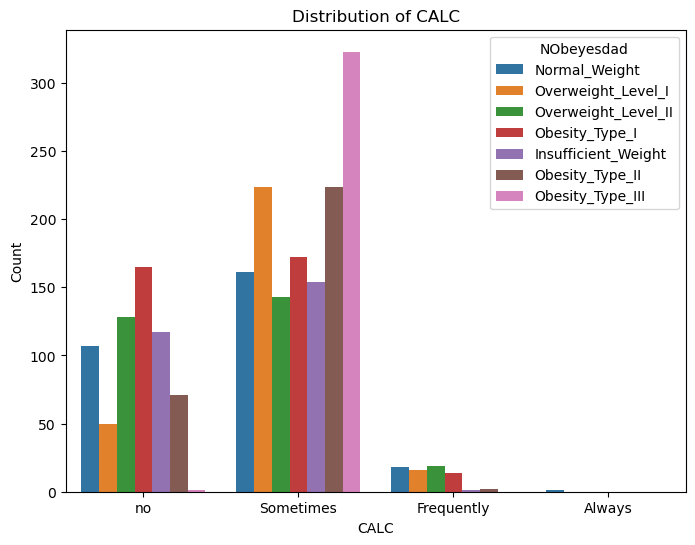

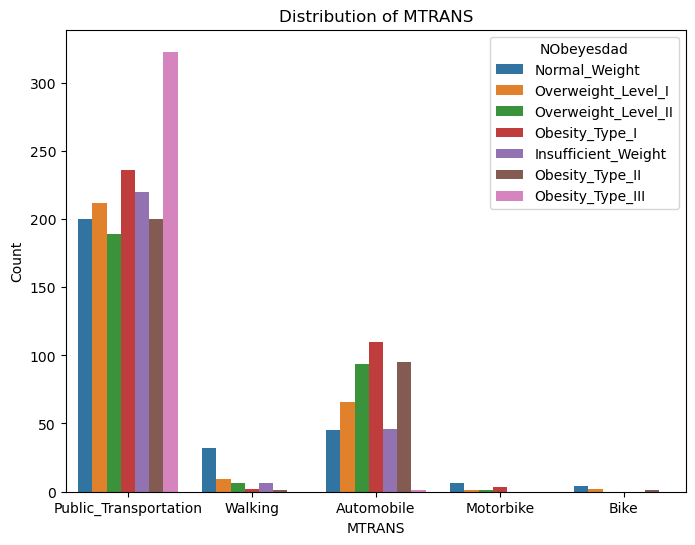

In [13]:
# Exploring categorical features
categorical_features = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue="NObeyesdad", data=data)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="NObeyesdad", loc="upper right")
    plt.show()

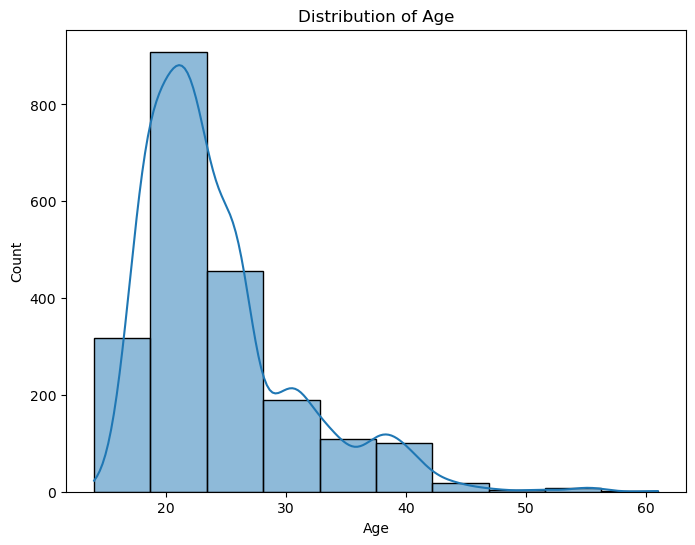

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

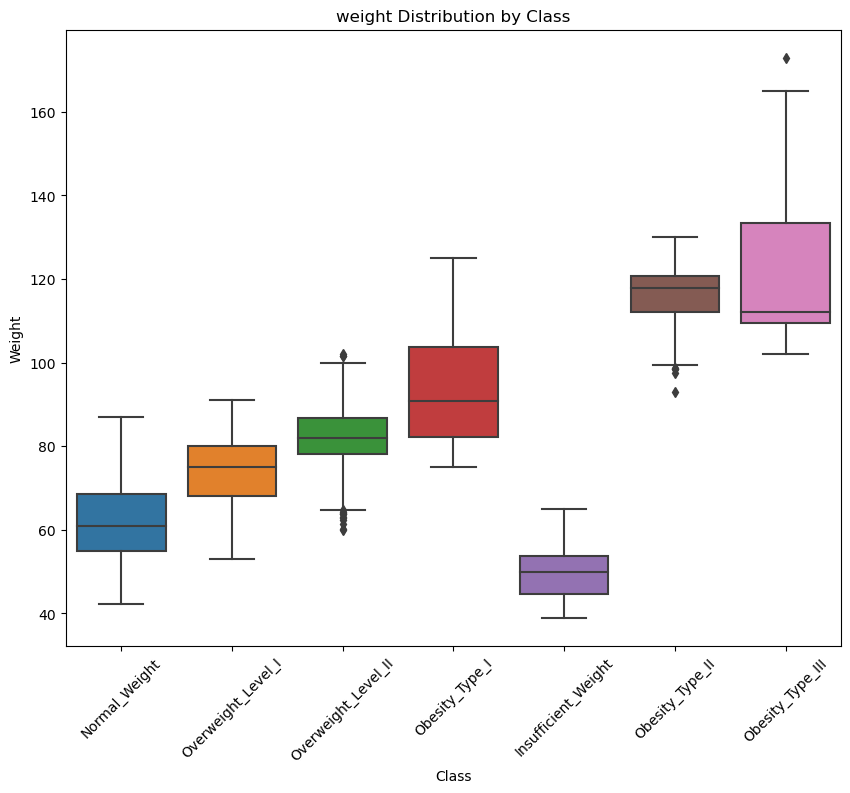

In [15]:
# Compare the BMI distribution across different classes
plt.figure(figsize=(10, 8))
sns.boxplot(x="NObeyesdad", y="Weight", data=data)
plt.title("weight Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()


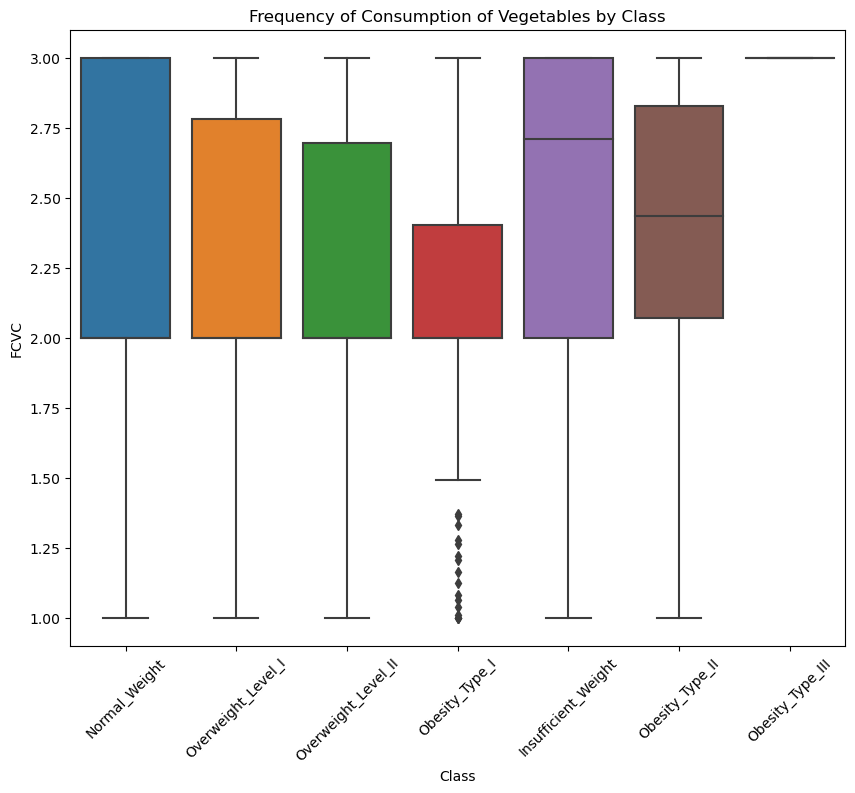

In [16]:
 #Box plot of FCVC (Frequency of consumption of vegetables)
plt.figure(figsize=(10, 8))
sns.boxplot(x="NObeyesdad", y="FCVC", data=data)
plt.title("Frequency of Consumption of Vegetables by Class")
plt.xlabel("Class")
plt.ylabel("FCVC")
plt.xticks(rotation=45)
plt.show()

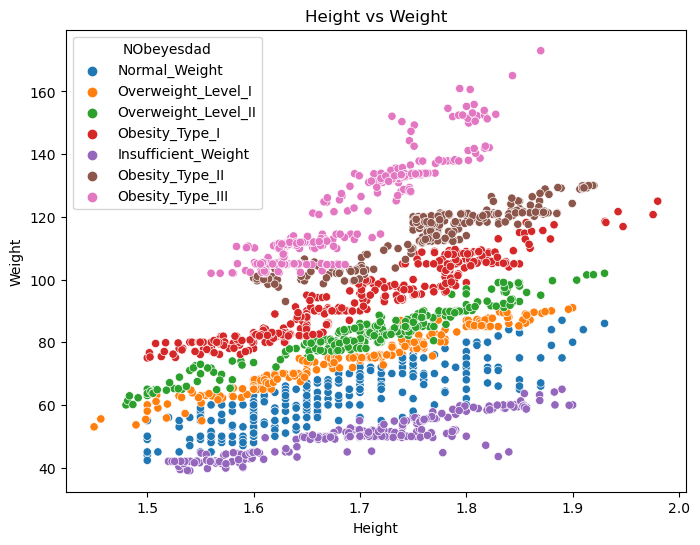

In [17]:
# Visualize the relationship between height and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", hue="NObeyesdad", data=data)
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

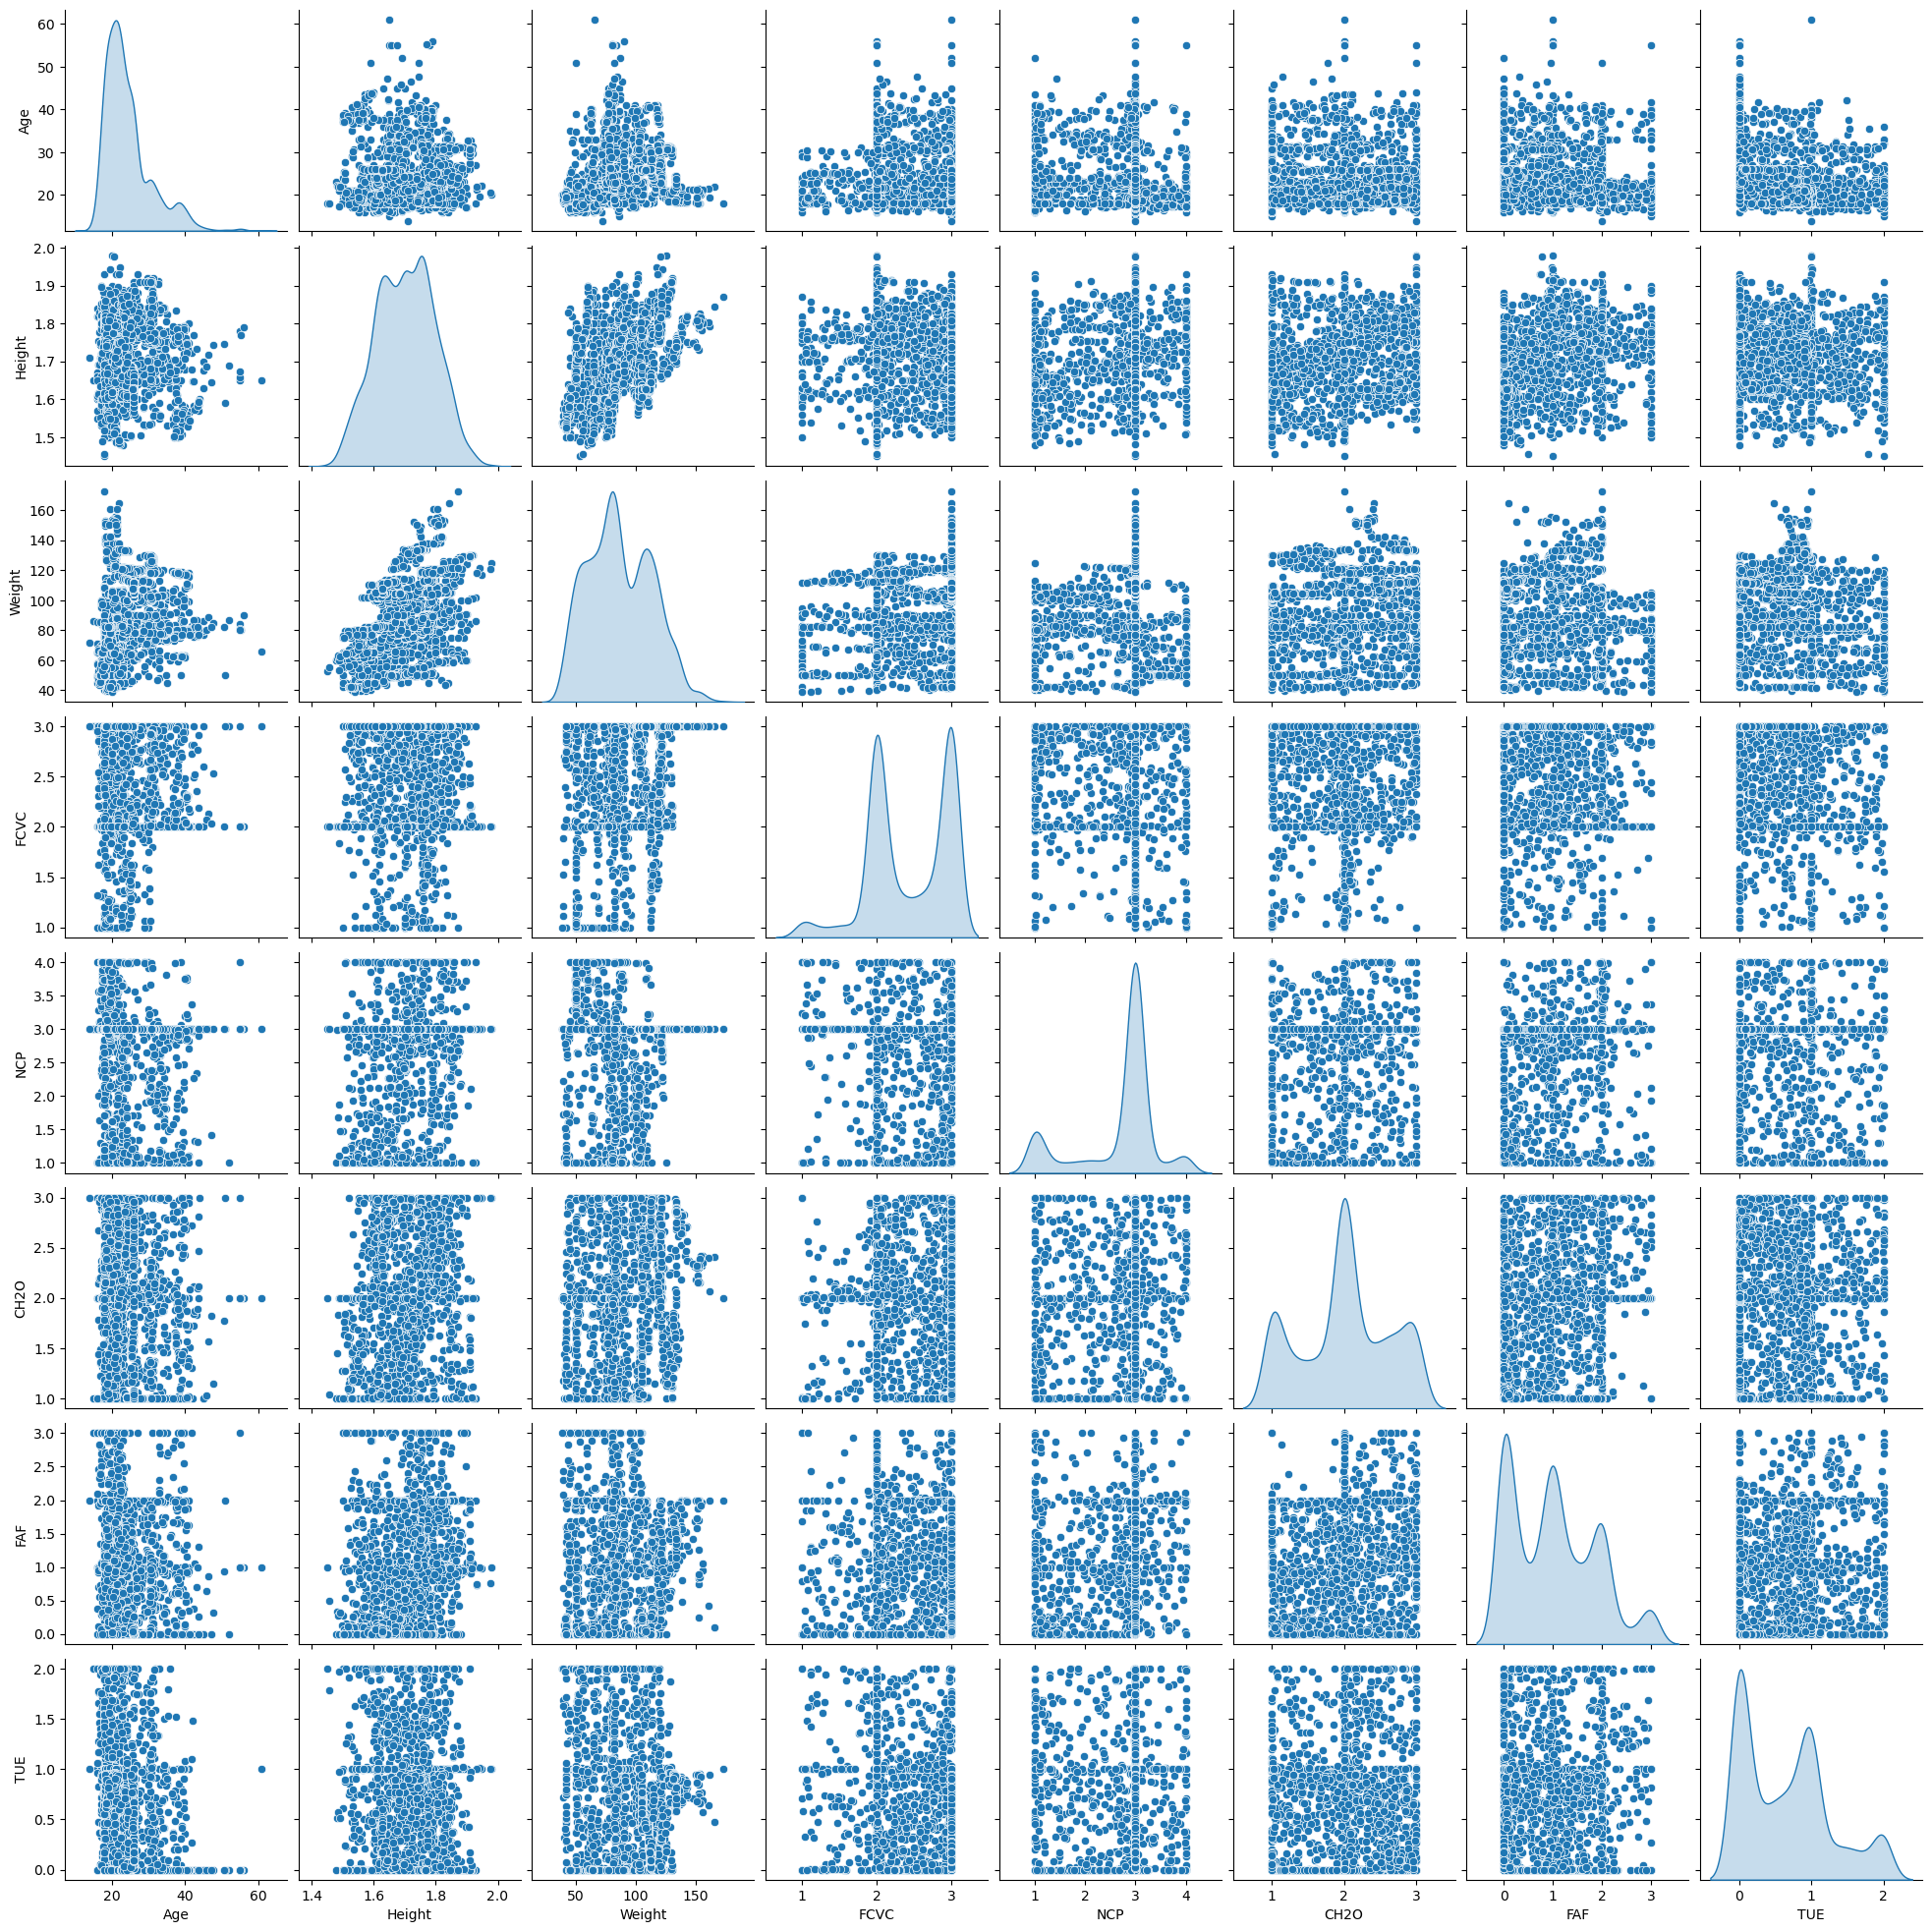

In [18]:
# Pairplot of numerical features
numerical_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
sns.pairplot(data[numerical_features], diag_kind="kde")
plt.show()

In [19]:
# Convert categorical variables to numerical labels
le = LabelEncoder()
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["family_history_with_overweight"] = le.fit_transform(data["family_history_with_overweight"])
data["FAVC"] = le.fit_transform(data["FAVC"])
data["CAEC"] = le.fit_transform(data["CAEC"])
data["SMOKE"] = le.fit_transform(data["SMOKE"])
data["SCC"] = le.fit_transform(data["SCC"])
data["CALC"] = le.fit_transform(data["CALC"])
data["MTRANS"] = le.fit_transform(data["MTRANS"])
data["NObeyesdad"] = le.fit_transform(data["NObeyesdad"])

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("NObeyesdad", axis=1), data["NObeyesdad"], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Train and evaluate the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Train and evaluate the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


C:\Users\z_parthak\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.67      0.45      0.54        62
           2       0.84      0.92      0.88        78
           3       0.92      0.98      0.95        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68 